### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### nem_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/nem_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.276383,0.292048,0.250638,0.286227,"7,635,410","2,487,450,000"
1,2017-09-04,0.307735,0.310661,0.256488,0.273220,"9,299,200","2,769,620,000"
2,2017-09-03,0.298170,0.320628,0.285382,0.307264,"7,413,990","2,683,530,000"
3,2017-09-02,0.331627,0.332056,0.283507,0.295884,"9,560,410","2,984,640,000"
4,2017-09-01,0.336602,0.337780,0.312575,0.332310,"12,082,700","3,029,420,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          889
Open          889
High          889
Low           889
Close         889
Volume        889
Market Cap    889
dtype: int64

as we can see we have in this file 7 columns and each column has 889 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,889.000000,889.000000,889.000000,889.000000
mean,0.030924,0.033154,0.028905,0.031218
std,0.071076,0.075895,0.066420,0.071526
min,0.000086,0.000089,0.000079,0.000086
25%,0.000164,0.000176,0.000155,0.000164
50%,0.002697,0.003041,0.002509,0.003041
75%,0.006950,0.007199,0.006559,0.006938
max,0.336602,0.349178,0.312575,0.337213


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
Date          889 non-null datetime64[ns]
Open          889 non-null float64
High          889 non-null float64
Low           889 non-null float64
Close         889 non-null float64
Volume        889 non-null object
Market Cap    889 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 48.7+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
884    False
885    False
886    False
887    False
888    False
Length: 889, dtype: bool

as we can see the data fram has 7 columns. each column has 85 cells, and there is no missing data, 


In [8]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [10]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [11]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Market Cap']=="-",'Market Cap']=0

In [13]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,889.000000,889.000000,889.000000,889.000000,8.890000e+02,8.890000e+02
mean,0.030924,0.033154,0.028905,0.031218,1.933999e+06,2.783157e+08
std,0.071076,0.075895,0.066420,0.071526,5.746952e+06,6.396820e+08
min,0.000086,0.000089,0.000079,0.000086,6.900000e+01,7.713480e+05
25%,0.000164,0.000176,0.000155,0.000164,4.765000e+03,1.473700e+06
50%,0.002697,0.003041,0.002509,0.003041,5.518900e+04,2.427420e+07
75%,0.006950,0.007199,0.006559,0.006938,4.709940e+05,6.254640e+07
max,0.336602,0.349178,0.312575,0.337213,7.375270e+07,3.029420e+09


In [14]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.997117,0.997727,0.995853,0.685805,1.000000
High,0.997117,1.000000,0.996286,0.998285,0.723254,0.997117
Low,0.997727,0.996286,1.000000,0.997246,0.678563,0.997727
Close,0.995853,0.998285,0.997246,1.000000,0.708469,0.995853
Volume,0.685805,0.723254,0.678563,0.708469,1.000000,0.685805
Market Cap,1.000000,0.997117,0.997727,0.995853,0.685805,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


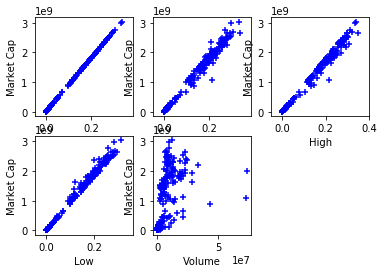

In [15]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [16]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [17]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Model Score
model.score(Open, Market_Cap)

0.9999999999822815

#### 4. Data Visualization

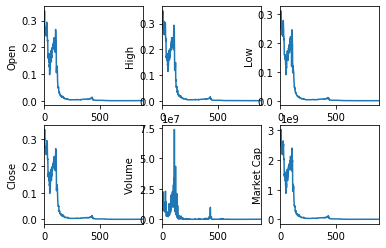

In [19]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()